### 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성

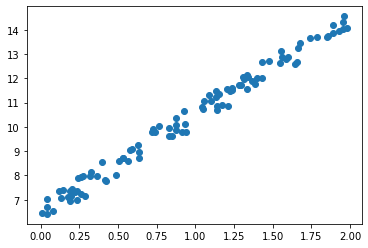

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6 식을 근사(w1=4, w0=6), random값은 Noise를 위해 만듬
X = 2 * np.random.rand(100, 1)
y = 6 + 4 *X + np.random.rand(100, 1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

#### w0과 w1값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임. 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 + ... + X(100)w1이며, 이는 입력 배열 X와 w1배열의 내적임
* 새로운 w1과 w0을 update함
    * 새로운 w_1 = 이전 w_1 $ - \eta * \frac{2}{N}\sum_{i=1}^{N} x_i * (실제값_i * 예측값_i)$
    * 새로운 w_0 = 이전 w_0 $ - \eta * \frac{2}{N}\sum_{i=1}^{N} (실제값_i * 예측값_i)$
        * $ \eta =$ learning_rate

In [3]:
# w1과 w0를 업데이트할 w1_update w2_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [8]:
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))

y_pred = np.dot(X, w1.T) + w0
# print('y_pred : ', y_pred)

diff = y - y_pred
# print('diff : ', diff)
print('diff.shape : ', diff.shape)

w0_factors = np.ones((100, 1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)

w1, w0

diff.shape :  (100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

#### 반복적으로 경사하강법을 이용하여 get_weight_updates()를 호출하여 w1과 w0을 업데이트 하는 함수 생성

In [9]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w2 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

#### 예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [10]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost:0.0775


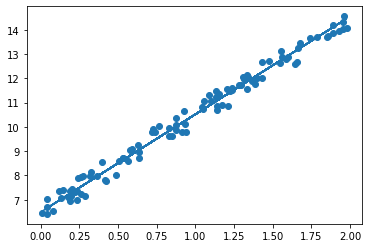

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred)

#### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 1000000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [15]:
np.random.permutation(X.shape[0])

array([53, 70, 30, 34, 84,  7, 62, 27, 52, 86, 56, 55, 59, 93, 51, 94, 22,
       49, 39, 58,  3, 74, 99, 73, 40, 57, 76, 45, 64, 32, 43, 33, 92, 68,
       82, 18, 71, 90, 60, 17, 63, 38, 36, 28, 46, 96, 54, 88, 21, 20, 98,
       24, 29, 47, 75,  0, 42, 97, 26, 65, 41, 44, 78, 15, 10, 87, 91, 31,
       13,  9, 81, 67, 19, 14, 72,  5, 50, 25,  8, 95, 61, 77, 69, 85, 23,
       16, 48, 80, 83, 66,  2, 79, 11, 89, 37,  6,  1,  4, 12, 35])

In [14]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1 : ', round(w1[0, 0], 3), "w0 : ", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(X, y_pred)))

w1 :  4.031 w0 :  6.486
Stochastic Gradient Descent Total Cost : 90.5195


---

## 사이킷런 LinearRegression 클래스

* class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
    * fit_intercept : intercept(절편)을 계산할 것인지
    * normalize : True값이라면 회귀를 수행하기 전에 입력 데이터 세트르르 정규화합니다.
    * coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성 Shape는 (Target값 계수, 피처 개수)
    * intercept_ : 절편 값
* LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스입니다.
* LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수(Cofficients)인 W를 coef_ 속성에 저장합니다.

### 선형 회귀의 다중 공선성 문제

* 일반적으로 선형 회귀는 입력 피처의 독립성에 많은 영향을 받습니다. 피처간의 상관관계가 매우 높은 경우, 분산이 매우 커져서 오류에 매우 민감해집니다.
* 위와 같은 현상을 다중 공선성(multi-collinearity) 문제라고 합니다.
* 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용합니다.

### 회귀 평가 지표

|평가 지표|설명|
|:-------------:|:-------|
| MAE | Mean Absolute Error이며 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것입니다. |
| MSE | Mean Squared Error이며 실제값과 예측값의 차이를 제곱해 평균한 것입니다. |
| MSLE | MSE에 로그를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다. |
| RMSE | MES 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운것이 RMSE(Root Mean Squared Error)입니다. |
| RMSLE | RMSE에 로그를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다. |
| $R^2$ | 분산 기반으로 예측 성능을 평가합니다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하여, 1에 가까울수록 예측 정확도가 높습니다. |

### 사이킷런 Scoring 함수에 회귀평가 적용 시 주의사항

* cross_val_score, GridSearchCV와 같은 Scoring함수에 회귀 평가 지표를 적용 시 유의 사항
* MAE의 사이킷런 scroing 파라미터 값은 'neg_mean_absolute_error'입니다. 이는 Negative(음수)값을 가진다는 의미인데, MAE는 절대값의 합이기 때문에 음수가 될 수 없습니다.
* Scoring함수에 'neg_mean_absolute_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문입니다. 따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 합니다.
    * 예를 들어 10>1 이지만 음수를 곱하면 -1>-10이 됩니다.
        * 성과지표는 일반적으로 큰수일수록 좋은 모델임을 나타내는데, 회귀 평가의 지표들은 반대로 숫자가 작을수록 좋은 모델임을 나타내기 때문에 -1값을 곱한다.
* metrics.mean_absolute_error()와 같은 사이킷런 평가 지표API는 정상적으로 양수의 값을 반환합니다. 하지만 Scoring함수의 scoring파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics.mean_absolute_error()이니 주의가 필요합니다.

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target

print('Boston 데이터셋 크기 : ', bostonDF.shape)

bostonDF.head()

Boston 데이터셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생율
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)


* **각 컬럼별로 주택가격에 미치는 영향도를 조사**

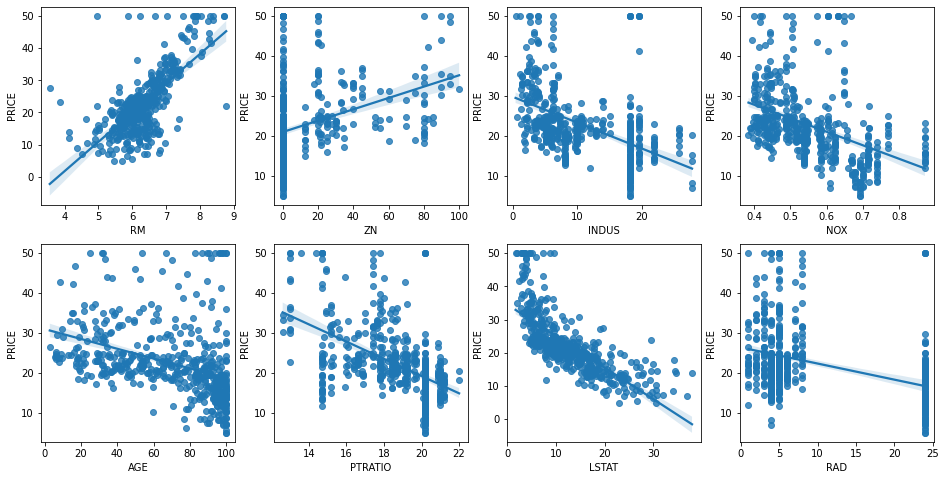

In [18]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2 )
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

#### 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [20]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172164315
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [21]:
# 회귀 계수를 큰 값으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False) # NOX값이 크기 때문에 예측결과가 NOX값의 영향을 많이 받음

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [22]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5Fold 셋으로 MSE를 구한 뒤, 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5) # 음수 반환
rmse_scores = np.sort(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [12.46 26.05 33.07 33.31 80.76]
5 folds의 평균 RMSE : 37.132
